# Module 2

In [1]:
import turicreate as tc

In [2]:
products = tc.SFrame('amazon_baby_subset.SFrame')

In [3]:
products

name,review,rating,sentiment
Stop Pacifier Suckingwithout tears with ...,All of my kids have criednon-stop when I tried to ...,5.0,1
Nature's Lullabies SecondYear Sticker Calendar ...,We wanted to getsomething to keep track ...,5.0,1
Nature's Lullabies SecondYear Sticker Calendar ...,My daughter had her 1stbaby over a year ago. ...,5.0,1
"Lamaze Peekaboo, I LoveYou ...","One of baby's first andfavorite books, and i ...",4.0,1
SoftPlay Peek-A-BooWhere's Elmo A Childr ...,Very cute interactivebook! My son loves this ...,5.0,1
Our Baby Girl Memory Book,"Beautiful book, I love itto record cherished t ...",5.0,1
Hunnt&reg; FallingFlowers and Birds Kids ...,"Try this out for a springproject !Easy ,fun and ...",5.0,1
Blessed By Pope BenedictXVI Divine Mercy Full ...,very nice Divine MercyPendant of Jesus now on ...,5.0,1
Cloth Diaper PinsStainless Steel ...,We bought the pins as my6 year old Autistic son ...,4.0,1
Cloth Diaper PinsStainless Steel ...,It has been many yearssince we needed diaper ...,5.0,1


In [4]:
print ('# of positive reviews =', len(products[products['sentiment']==1]))
print ('# of negative reviews =', len(products[products['sentiment']==-1]))

# of positive reviews = 26579
# of negative reviews = 26493


In [5]:
import json
with open('important_words.json', 'r') as f: # Reads the list of most frequent words
    important_words = json.load(f)
important_words = [str(s) for s in important_words]

In [6]:
important_words

['baby',
 'one',
 'great',
 'love',
 'use',
 'would',
 'like',
 'easy',
 'little',
 'seat',
 'old',
 'well',
 'get',
 'also',
 'really',
 'son',
 'time',
 'bought',
 'product',
 'good',
 'daughter',
 'much',
 'loves',
 'stroller',
 'put',
 'months',
 'car',
 'still',
 'back',
 'used',
 'recommend',
 'first',
 'even',
 'perfect',
 'nice',
 'bag',
 'two',
 'using',
 'got',
 'fit',
 'around',
 'diaper',
 'enough',
 'month',
 'price',
 'go',
 'could',
 'soft',
 'since',
 'buy',
 'room',
 'works',
 'made',
 'child',
 'keep',
 'size',
 'small',
 'need',
 'year',
 'big',
 'make',
 'take',
 'easily',
 'think',
 'crib',
 'clean',
 'way',
 'quality',
 'thing',
 'better',
 'without',
 'set',
 'new',
 'every',
 'cute',
 'best',
 'bottles',
 'work',
 'purchased',
 'right',
 'lot',
 'side',
 'happy',
 'comfortable',
 'toy',
 'able',
 'kids',
 'bit',
 'night',
 'long',
 'fits',
 'see',
 'us',
 'another',
 'play',
 'day',
 'money',
 'monitor',
 'tried',
 'thought',
 'never',
 'item',
 'hard',
 'plasti

In [7]:
def remove_punctuation(text):
    import string
    return text.translate(string.punctuation) 

products['review_clean'] = products['review'].apply(remove_punctuation)

In [9]:
for word in important_words:
    products[word] = products['review_clean'].apply(lambda s : s.split().count(word))

In [11]:
products['perfect']

dtype: int
Rows: 53072
[0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ... ]

In [12]:
products['contains_perfect'] = products['perfect'].apply(lambda x: 1 if x >= 1 else 0)

In [13]:

products['contains_perfect'].sum()

2303

In [14]:
products

name,review,rating,sentiment,review_clean,baby
Stop Pacifier Suckingwithout tears with ...,All of my kids have criednon-stop when I tried to ...,5.0,1,All of my kids have criednon-stop when I tried to ...,0
Nature's Lullabies SecondYear Sticker Calendar ...,We wanted to getsomething to keep track ...,5.0,1,We wanted to getsomething to keep track ...,0
Nature's Lullabies SecondYear Sticker Calendar ...,My daughter had her 1stbaby over a year ago. ...,5.0,1,My daughter had her 1stbaby over a year ago. ...,1
"Lamaze Peekaboo, I LoveYou ...","One of baby's first andfavorite books, and i ...",4.0,1,"One of baby's first andfavorite books, and i ...",0
SoftPlay Peek-A-BooWhere's Elmo A Childr ...,Very cute interactivebook! My son loves this ...,5.0,1,Very cute interactivebook! My son loves this ...,0
Our Baby Girl Memory Book,"Beautiful book, I love itto record cherished t ...",5.0,1,"Beautiful book, I love itto record cherished t ...",0
Hunnt&reg; FallingFlowers and Birds Kids ...,"Try this out for a springproject !Easy ,fun and ...",5.0,1,"Try this out for a springproject !Easy ,fun and ...",0
Blessed By Pope BenedictXVI Divine Mercy Full ...,very nice Divine MercyPendant of Jesus now on ...,5.0,1,very nice Divine MercyPendant of Jesus now on ...,0
Cloth Diaper PinsStainless Steel ...,We bought the pins as my6 year old Autistic son ...,4.0,1,We bought the pins as my6 year old Autistic son ...,0
Cloth Diaper PinsStainless Steel ...,It has been many yearssince we needed diaper ...,5.0,1,It has been many yearssince we needed diaper ...,0


In [15]:
import numpy as np

def get_numpy_data(data_sframe, features, label):
    data_sframe['intercept'] = 1
    features = ['intercept'] + features
    features_sframe = data_sframe[features]
    feature_matrix = features_sframe.to_numpy()
    label_sarray = data_sframe[label]
    label_array = label_sarray.to_numpy()
    return(feature_matrix, label_array)

In [16]:
feature_matrix, sentiment = get_numpy_data(products, important_words, 'sentiment')

In [17]:
feature_matrix.shape

(53072, 194)

In [18]:
sentiment

array([ 1,  1,  1, ..., -1, -1, -1])

In [19]:
len(sentiment)

53072

In [20]:
'''
produces probablistic estimate for P(y_i = +1 | x_i, w).
estimate ranges between 0 and 1.
'''
def predict_probability(feature_matrix, coefficients):
    # Take dot product of feature_matrix and coefficients  
    # YOUR CODE HERE
    scores = np.dot(feature_matrix, coefficients)
    
    # Compute P(y_i = +1 | x_i, w) using the link function
    # YOUR CODE HERE
    predictions = 1. / (1 + np.exp(-scores))
    
    # return predictions
    return predictions

In [21]:
def feature_derivative(errors, feature):     
    # Compute the dot product of errors and feature
    derivative = np.dot(errors, feature)
    
    # Return the derivative
    return derivative

In [22]:
def compute_log_likelihood(feature_matrix, sentiment, coefficients):
    indicator = (sentiment==+1)
    scores = np.dot(feature_matrix, coefficients)
    logexp = np.log(1. + np.exp(-scores))
    
    # Simple check to prevent overflow
    mask = np.isinf(logexp)
    logexp[mask] = -scores[mask]
    
    lp = np.sum((indicator-1)*scores - logexp)
    return lp

In [23]:
from math import sqrt

def logistic_regression(feature_matrix, sentiment, initial_coefficients, step_size, max_iter):
    coefficients = np.array(initial_coefficients) # make sure it's a numpy array
    for itr in range(max_iter):

        # Predict P(y_i = +1|x_i,w) using your predict_probability() function
        # YOUR CODE HERE
        predictions = predict_probability(feature_matrix, coefficients)
        
        # Compute indicator value for (y_i = +1)
        indicator = (sentiment==+1)
        
        # Compute the errors as indicator - predictions
        errors = indicator - predictions
        for j in range(len(coefficients)): # loop over each coefficient
            
            # Recall that feature_matrix[:,j] is the feature column associated with coefficients[j].
            # Compute the derivative for coefficients[j]. Save it in a variable called derivative
            # YOUR CODE HERE
            derivative = feature_derivative(errors, feature_matrix[:, j])
            
            # add the step size times the derivative to the current coefficient
            ## YOUR CODE HERE
            coefficients[j] += step_size * derivative
        
        # Checking whether log likelihood is increasing
        if itr <= 15 or (itr <= 100 and itr % 10 == 0) or (itr <= 1000 and itr % 100 == 0) \
        or (itr <= 10000 and itr % 1000 == 0) or itr % 10000 == 0:
            lp = compute_log_likelihood(feature_matrix, sentiment, coefficients)
            print ('iteration %*d: log likelihood of observed labels = %.8f' % \
                (int(np.ceil(np.log10(max_iter))), itr, lp))
            
    return coefficients

In [24]:
coefficients = logistic_regression(feature_matrix, sentiment, initial_coefficients=np.zeros(194),
                                   step_size=1e-7, max_iter=301)

iteration   0: log likelihood of observed labels = -36782.24149905
iteration   1: log likelihood of observed labels = -36777.77993493
iteration   2: log likelihood of observed labels = -36773.32246359
iteration   3: log likelihood of observed labels = -36768.86907436
iteration   4: log likelihood of observed labels = -36764.41975666
iteration   5: log likelihood of observed labels = -36759.97449997
iteration   6: log likelihood of observed labels = -36755.53329383
iteration   7: log likelihood of observed labels = -36751.09612785
iteration   8: log likelihood of observed labels = -36746.66299174
iteration   9: log likelihood of observed labels = -36742.23387522
iteration  10: log likelihood of observed labels = -36737.80876812
iteration  11: log likelihood of observed labels = -36733.38766031
iteration  12: log likelihood of observed labels = -36728.97054176
iteration  13: log likelihood of observed labels = -36724.55740245
iteration  14: log likelihood of observed labels = -36720.1482

In [25]:

# Compute the scores as a dot product between feature_matrix and coefficients.
scores = np.dot(feature_matrix, coefficients)

In [27]:
class_predictions = np.array(tc.SArray(scores).apply(lambda x: 1 if x> 0 else -1))
print (class_predictions)

[ 1 -1  1 ... -1 -1 -1]


In [29]:
unique, counts = np.unique(class_predictions, return_counts=True)
print (unique, counts)

[-1  1] [28358 24714]


In [30]:
len(sentiment)

53072

In [31]:
num_mistakes = (class_predictions != sentiment).sum() # YOUR CODE HERE
num_correct = len(sentiment) - num_mistakes
accuracy = num_correct/float(len(sentiment)) # YOUR CODE HERE
print ("-----------------------------------------------------")
print ('# Reviews   correctly classified =', len(products) - num_mistakes)
print ('# Reviews incorrectly classified =', num_mistakes)
print ('# Reviews total                  =', len(products))
print ("-----------------------------------------------------")
print ('Accuracy = %.2f' % accuracy)

-----------------------------------------------------
# Reviews   correctly classified = 39117
# Reviews incorrectly classified = 13955
# Reviews total                  = 53072
-----------------------------------------------------
Accuracy = 0.74


In [32]:
coefficients = list(coefficients[1:]) # exclude intercept
word_coefficient_tuples = [(word, coefficient) for word, coefficient in zip(important_words, coefficients)]
word_coefficient_tuples = sorted(word_coefficient_tuples, key=lambda x:x[1], reverse=True)

In [33]:
word_coefficient_tuples[0:5]

[('love', 0.06516288823238833),
 ('easy', 0.062029546990689015),
 ('great', 0.0506832503387355),
 ('little', 0.04496421284998458),
 ('loves', 0.04487736399389728)]

In [34]:
word_coefficient_tuples[0:10]

[('love', 0.06516288823238833),
 ('easy', 0.062029546990689015),
 ('great', 0.0506832503387355),
 ('little', 0.04496421284998458),
 ('loves', 0.04487736399389728),
 ('perfect', 0.022685984298359947),
 ('well', 0.02069821773359),
 ('fits', 0.01708208087034107),
 ('nice', 0.016540658492544564),
 ('daughter', 0.01645555655729781)]

In [35]:
word_coefficient_tuples[-10:]

[('monitor', -0.02068181121460328),
 ('thought', -0.020756425233543412),
 ('work', -0.02094666567861414),
 ('money', -0.0223526167156249),
 ('waste', -0.02315534512199584),
 ('return', -0.024570662566524983),
 ('get', -0.02932399727767066),
 ('even', -0.030214144320453017),
 ('product', -0.03617625947473382),
 ('would', -0.0538797585447843)]

# Module 3

In [37]:
from __future__ import division
import turicreate as tc

In [38]:
products = tc.SFrame('amazon_baby_subset.SFrame')

In [39]:
products

name,review,rating,sentiment
Stop Pacifier Suckingwithout tears with ...,All of my kids have criednon-stop when I tried to ...,5.0,1
Nature's Lullabies SecondYear Sticker Calendar ...,We wanted to getsomething to keep track ...,5.0,1
Nature's Lullabies SecondYear Sticker Calendar ...,My daughter had her 1stbaby over a year ago. ...,5.0,1
"Lamaze Peekaboo, I LoveYou ...","One of baby's first andfavorite books, and i ...",4.0,1
SoftPlay Peek-A-BooWhere's Elmo A Childr ...,Very cute interactivebook! My son loves this ...,5.0,1
Our Baby Girl Memory Book,"Beautiful book, I love itto record cherished t ...",5.0,1
Hunnt&reg; FallingFlowers and Birds Kids ...,"Try this out for a springproject !Easy ,fun and ...",5.0,1
Blessed By Pope BenedictXVI Divine Mercy Full ...,very nice Divine MercyPendant of Jesus now on ...,5.0,1
Cloth Diaper PinsStainless Steel ...,We bought the pins as my6 year old Autistic son ...,4.0,1
Cloth Diaper PinsStainless Steel ...,It has been many yearssince we needed diaper ...,5.0,1


In [41]:

# The same feature processing (same as the previous assignments)
# ---------------------------------------------------------------
import json
with open('important_words.json', 'r') as f: # Reads the list of most frequent words
    important_words = json.load(f)
important_words = [str(s) for s in important_words]


def remove_punctuation(text):
    import string
    return text.translate(string.punctuation) 

# Remove punctuation.
products['review_clean'] = products['review'].apply(remove_punctuation)

# Split out the words into individual columns
for word in important_words:
    products[word] = products['review_clean'].apply(lambda s : s.split().count(word))

In [42]:
products

name,review,rating,sentiment,review_clean,baby
Stop Pacifier Suckingwithout tears with ...,All of my kids have criednon-stop when I tried to ...,5.0,1,All of my kids have criednon-stop when I tried to ...,0
Nature's Lullabies SecondYear Sticker Calendar ...,We wanted to getsomething to keep track ...,5.0,1,We wanted to getsomething to keep track ...,0
Nature's Lullabies SecondYear Sticker Calendar ...,My daughter had her 1stbaby over a year ago. ...,5.0,1,My daughter had her 1stbaby over a year ago. ...,1
"Lamaze Peekaboo, I LoveYou ...","One of baby's first andfavorite books, and i ...",4.0,1,"One of baby's first andfavorite books, and i ...",0
SoftPlay Peek-A-BooWhere's Elmo A Childr ...,Very cute interactivebook! My son loves this ...,5.0,1,Very cute interactivebook! My son loves this ...,0
Our Baby Girl Memory Book,"Beautiful book, I love itto record cherished t ...",5.0,1,"Beautiful book, I love itto record cherished t ...",0
Hunnt&reg; FallingFlowers and Birds Kids ...,"Try this out for a springproject !Easy ,fun and ...",5.0,1,"Try this out for a springproject !Easy ,fun and ...",0
Blessed By Pope BenedictXVI Divine Mercy Full ...,very nice Divine MercyPendant of Jesus now on ...,5.0,1,very nice Divine MercyPendant of Jesus now on ...,0
Cloth Diaper PinsStainless Steel ...,We bought the pins as my6 year old Autistic son ...,4.0,1,We bought the pins as my6 year old Autistic son ...,0
Cloth Diaper PinsStainless Steel ...,It has been many yearssince we needed diaper ...,5.0,1,It has been many yearssince we needed diaper ...,0


In [43]:

train_data, validation_data = products.random_split(.8, seed=2)

In [44]:
import numpy as np

def get_numpy_data(data_sframe, features, label):
    data_sframe['intercept'] = 1
    features = ['intercept'] + features
    features_sframe = data_sframe[features]
    feature_matrix = features_sframe.to_numpy()
    label_sarray = data_sframe[label]
    label_array = label_sarray.to_numpy()
    return(feature_matrix, label_array)

In [47]:
feature_matrix_train, sentiment_train = get_numpy_data(train_data, important_words, 'sentiment')
feature_matrix_valid, sentiment_valid = get_numpy_data(validation_data, important_words, 'sentiment')

In [46]:
'''
produces probablistic estimate for P(y_i = +1 | x_i, w).
estimate ranges between 0 and 1.
'''
def predict_probability(feature_matrix, coefficients):
    # Take dot product of feature_matrix and coefficients  
    ## YOUR CODE HERE
    scores = np.dot(feature_matrix, coefficients)
    
    # Compute P(y_i = +1 | x_i, w) using the link function
    ## YOUR CODE HERE
    predictions = 1./(1 + np.exp(-scores))
    
    return predictions


In [48]:
def feature_derivative_with_L2(errors, feature, coefficient, l2_penalty, feature_is_constant): 
    
    # Compute the dot product of errors and feature
    ## YOUR CODE HERE
    derivative = np.dot(errors, feature)

    # add L2 penalty term for any feature that isn't the intercept.
    if not feature_is_constant: 
        ## YOUR CODE HERE
        derivative -= (2 * l2_penalty * coefficient)
        
    return derivative

In [49]:
def compute_log_likelihood_with_L2(feature_matrix, sentiment, coefficients, l2_penalty):
    indicator = (sentiment==+1)
    scores = np.dot(feature_matrix, coefficients)
    
    lp = np.sum((indicator-1)*scores - np.log(1. + np.exp(-scores))) - l2_penalty*np.sum(coefficients[1:]**2)
    
    return lp

In [50]:
def logistic_regression_with_L2(feature_matrix, sentiment, initial_coefficients, step_size, l2_penalty, max_iter):
    coefficients = np.array(initial_coefficients) # make sure it's a numpy array
    for itr in range(max_iter):
        # Predict P(y_i = +1|x_i,w) using your predict_probability() function
        ## YOUR CODE HERE
        predictions = predict_probability(feature_matrix, coefficients)
        
        # Compute indicator value for (y_i = +1)
        indicator = (sentiment==+1)
        
        # Compute the errors as indicator - predictions
        errors = indicator - predictions
        for j in range(len(coefficients)): # loop over each coefficient
            is_intercept = (j == 0)
            # Recall that feature_matrix[:,j] is the feature column associated with coefficients[j].
            # Compute the derivative for coefficients[j]. Save it in a variable called derivative
            ## YOUR CODE HERE
            derivative = feature_derivative_with_L2(errors, feature_matrix[:,j], coefficients[j], l2_penalty, is_intercept)
            
            # add the step size times the derivative to the current coefficient
            ## YOUR CODE HERE
            coefficients[j] += step_size * derivative
        
        # Checking whether log likelihood is increasing
        if itr <= 15 or (itr <= 100 and itr % 10 == 0) or (itr <= 1000 and itr % 100 == 0) \
        or (itr <= 10000 and itr % 1000 == 0) or itr % 10000 == 0:
            lp = compute_log_likelihood_with_L2(feature_matrix, sentiment, coefficients, l2_penalty)
            print ('iteration %*d: log likelihood of observed labels = %.8f' % \
                (int(np.ceil(np.log10(max_iter))), itr, lp))
    return coefficients

In [51]:
# run with L2 = 0
coefficients_0_penalty = logistic_regression_with_L2(feature_matrix_train, sentiment_train,
                                                     initial_coefficients=np.zeros(194),
                                                     step_size=5e-6, l2_penalty=0, max_iter=501)

iteration   0: log likelihood of observed labels = -29221.21883537
iteration   1: log likelihood of observed labels = -29084.95004081
iteration   2: log likelihood of observed labels = -28953.16751027
iteration   3: log likelihood of observed labels = -28825.53328562
iteration   4: log likelihood of observed labels = -28701.77555327
iteration   5: log likelihood of observed labels = -28581.66893780
iteration   6: log likelihood of observed labels = -28465.02128437
iteration   7: log likelihood of observed labels = -28351.66467192
iteration   8: log likelihood of observed labels = -28241.44923653
iteration   9: log likelihood of observed labels = -28134.23889767
iteration  10: log likelihood of observed labels = -28029.90838872
iteration  11: log likelihood of observed labels = -27928.34118478
iteration  12: log likelihood of observed labels = -27829.42804628
iteration  13: log likelihood of observed labels = -27733.06598310
iteration  14: log likelihood of observed labels = -27639.1575

In [52]:
# run with L2 = 4
coefficients_4_penalty = logistic_regression_with_L2(feature_matrix_train, sentiment_train,
                                                      initial_coefficients=np.zeros(194),
                                                      step_size=5e-6, l2_penalty=4, max_iter=501)

iteration   0: log likelihood of observed labels = -29221.22168459
iteration   1: log likelihood of observed labels = -29084.96672750
iteration   2: log likelihood of observed labels = -28953.20827762
iteration   3: log likelihood of observed labels = -28825.60772339
iteration   4: log likelihood of observed labels = -28701.89266497
iteration   5: log likelihood of observed labels = -28581.83719214
iteration   6: log likelihood of observed labels = -28465.24865646
iteration   7: log likelihood of observed labels = -28351.95867784
iteration   8: log likelihood of observed labels = -28241.81696333
iteration   9: log likelihood of observed labels = -28134.68703034
iteration  10: log likelihood of observed labels = -28030.44323484
iteration  11: log likelihood of observed labels = -27928.96869736
iteration  12: log likelihood of observed labels = -27830.15384515
iteration  13: log likelihood of observed labels = -27733.89537494
iteration  14: log likelihood of observed labels = -27640.0955

In [53]:

# run with L2 = 1e2
coefficients_1e2_penalty = logistic_regression_with_L2(feature_matrix_train, sentiment_train,
                                                       initial_coefficients=np.zeros(194),
                                                       step_size=5e-6, l2_penalty=1e2, max_iter=501)

iteration   0: log likelihood of observed labels = -29221.29006569
iteration   1: log likelihood of observed labels = -29085.36693825
iteration   2: log likelihood of observed labels = -28954.18538135
iteration   3: log likelihood of observed labels = -28827.39064810
iteration   4: log likelihood of observed labels = -28704.69585791
iteration   5: log likelihood of observed labels = -28585.86189203
iteration   6: log likelihood of observed labels = -28470.68391666
iteration   7: log likelihood of observed labels = -28358.98222530
iteration   8: log likelihood of observed labels = -28250.59594738
iteration   9: log likelihood of observed labels = -28145.37869457
iteration  10: log likelihood of observed labels = -28043.19553225
iteration  11: log likelihood of observed labels = -27943.92086053
iteration  12: log likelihood of observed labels = -27847.43691827
iteration  13: log likelihood of observed labels = -27753.63271190
iteration  14: log likelihood of observed labels = -27662.4032

In [54]:
# run with L2 = 1e5
coefficients_1e5_penalty = logistic_regression_with_L2(feature_matrix_train, sentiment_train,
                                                       initial_coefficients=np.zeros(194),
                                                       step_size=5e-6, l2_penalty=1e5, max_iter=501)

iteration   0: log likelihood of observed labels = -29292.44915662
iteration   1: log likelihood of observed labels = -29292.34327181
iteration   2: log likelihood of observed labels = -29292.29816820
iteration   3: log likelihood of observed labels = -29292.25832068
iteration   4: log likelihood of observed labels = -29292.22233186
iteration   5: log likelihood of observed labels = -29292.18980711
iteration   6: log likelihood of observed labels = -29292.16041245
iteration   7: log likelihood of observed labels = -29292.13384662
iteration   8: log likelihood of observed labels = -29292.10983739
iteration   9: log likelihood of observed labels = -29292.08813873
iteration  10: log likelihood of observed labels = -29292.06852827
iteration  11: log likelihood of observed labels = -29292.05080505
iteration  12: log likelihood of observed labels = -29292.03478746
iteration  13: log likelihood of observed labels = -29292.02031133
iteration  14: log likelihood of observed labels = -29292.0072

In [55]:
table = tc.SFrame({'word': ['(intercept)'] + important_words})

def add_coefficients_to_table(coefficients, column_name):
    table[column_name] = coefficients
    return table

In [58]:
add_coefficients_to_table(coefficients_0_penalty, 'coefficients [L2=0]')
add_coefficients_to_table(coefficients_4_penalty, 'coefficients [L2=4]')
add_coefficients_to_table(coefficients_1e2_penalty, 'coefficients [L2=1e2]')
add_coefficients_to_table(coefficients_1e5_penalty, 'coefficients [L2=1e5]')

word,coefficients [L2=0],coefficients [L2=4],coefficients [L2=1e2],coefficients [L2=1e5]
(intercept),-0.07018376901387631,-0.06956285336278382,-0.05622849235494574,0.010482183284496124
baby,0.0912083082216293,0.09100441791170741,0.08681023194059209,0.0016691705651350652
one,0.01680317439329084,0.016578376748017848,0.012000770741970385,-0.001228940462457025
great,0.7578903461075899,0.7530360187583385,0.6546863173917857,0.00673676068854955
love,1.0938722028363157,1.086041519540465,0.9285467681735209,0.008886791675801857
use,0.0648063656884851,0.06464773208003197,0.06130827400696956,0.0008294010719262155
would,-0.2828486391175504,-0.28196975944978414,-0.26418278531016265,-0.008046457646741504
like,-0.007723751806430471,-0.00773993505361219,-0.008146344679153825,-0.0008545246916566021
easy,1.0080621123177664,1.000964365903265,0.8582431858884951,0.008354900125834501
little,0.5260443161005421,0.5231472355225317,0.4644022021773782,0.005871465966807507


In [64]:
positive_words = table.sort('coefficients [L2=0]', ascending = False)[0:5]['word']
print (positive_words)

['love', 'loves', 'easy', 'great', 'perfect']


In [63]:
negative_words = table.sort('coefficients [L2=0]', ascending = True)[0:5]['word']
print (negative_words)

['waste', 'disappointed', 'return', 'money', 'returned']


In [61]:
import matplotlib.pyplot as plt
%matplotlib inline
plt.rcParams['figure.figsize'] = 10, 6

def make_coefficient_plot(table, positive_words, negative_words, l2_penalty_list):
    cmap_positive = plt.get_cmap('Reds')
    cmap_negative = plt.get_cmap('Blues')
    
    xx = l2_penalty_list
    plt.plot(xx, [0.]*len(xx), '--', lw=1, color='k')
    
    table_positive_words = table.filter_by(column_name='word', values=positive_words)
    table_negative_words = table.filter_by(column_name='word', values=negative_words)
    del table_positive_words['word']
    del table_negative_words['word']
    
    for i in range(len(positive_words)):
        color = cmap_positive(0.8*((i+1)/(len(positive_words)*1.2)+0.15))
        plt.plot(xx, table_positive_words[i:i+1].to_numpy().flatten(),
                 '-', label=positive_words[i], linewidth=4.0, color=color)
        
    for i in range(len(negative_words)):
        color = cmap_negative(0.8*((i+1)/(len(negative_words)*1.2)+0.15))
        plt.plot(xx, table_negative_words[i:i+1].to_numpy().flatten(),
                 '-', label=negative_words[i], linewidth=4.0, color=color)
        
    plt.legend(loc='best', ncol=3, prop={'size':16}, columnspacing=0.5)
    plt.axis([1, 1e5, -1, 2])
    plt.title('Coefficient path')
    plt.xlabel('L2 penalty ($\lambda$)')
    plt.ylabel('Coefficient value')
    plt.xscale('log')
    plt.rcParams.update({'font.size': 18})
    plt.tight_layout()

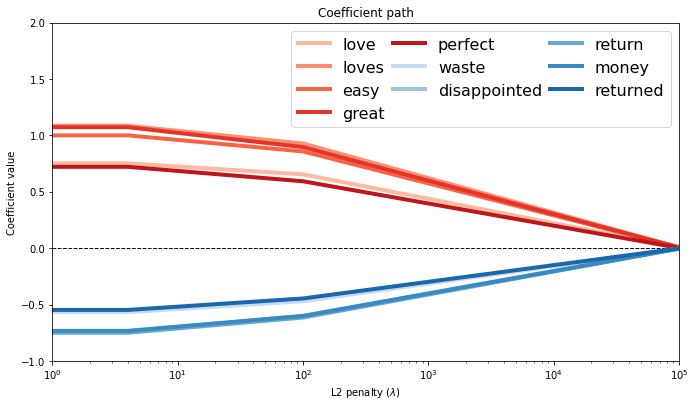

In [65]:
make_coefficient_plot(table, positive_words, negative_words, l2_penalty_list=[0, 4,  1e2, 1e5])

In [66]:
def get_classification_accuracy(feature_matrix, sentiment, coefficients):
    scores = np.dot(feature_matrix, coefficients)
    apply_threshold = np.vectorize(lambda x: 1. if x > 0  else -1.)
    predictions = apply_threshold(scores)
    
    num_correct = (predictions == sentiment).sum()
    accuracy = num_correct / len(feature_matrix)    
    return accuracy

In [67]:
train_accuracy = {}
train_accuracy[0]   = get_classification_accuracy(feature_matrix_train, sentiment_train, coefficients_0_penalty)
train_accuracy[4]   = get_classification_accuracy(feature_matrix_train, sentiment_train, coefficients_4_penalty)
train_accuracy[1e2] = get_classification_accuracy(feature_matrix_train, sentiment_train, coefficients_1e2_penalty)
train_accuracy[1e5] = get_classification_accuracy(feature_matrix_train, sentiment_train, coefficients_1e5_penalty)

validation_accuracy = {}
validation_accuracy[0]   = get_classification_accuracy(feature_matrix_valid, sentiment_valid, coefficients_0_penalty)
validation_accuracy[4]   = get_classification_accuracy(feature_matrix_valid, sentiment_valid, coefficients_4_penalty)
validation_accuracy[1e2] = get_classification_accuracy(feature_matrix_valid, sentiment_valid, coefficients_1e2_penalty)
validation_accuracy[1e5] = get_classification_accuracy(feature_matrix_valid, sentiment_valid, coefficients_1e5_penalty)

In [68]:

# Build a simple report
for key in sorted(validation_accuracy.keys()):
    print ("L2 penalty = %g" % key)
    print ("train accuracy = %s, validation_accuracy = %s" % (train_accuracy[key], validation_accuracy[key]))
    print ("--------------------------------------------------------------------------------")

L2 penalty = 0
train accuracy = 0.7700715280564671, validation_accuracy = 0.7664083652320045
--------------------------------------------------------------------------------
L2 penalty = 4
train accuracy = 0.7699771015792828, validation_accuracy = 0.7663150032676688
--------------------------------------------------------------------------------
L2 penalty = 100
train accuracy = 0.7683246382285593, validation_accuracy = 0.7661282793389973
--------------------------------------------------------------------------------
L2 penalty = 100000
train accuracy = 0.6534784353532731, validation_accuracy = 0.644664363738213
--------------------------------------------------------------------------------
